USE CASE - DAY 8: 15.08.2018

### Objective - To use kNN as a kind of a recommendation/prediction for movies.

Datasets
As discussed in class, you will build your model using the training data. To test your model, you will calculate predictions for each entry in the test set (a userID/movieID pair), and since you know the real rating, you can compute the difference between the two, and determine how well your method performs, as an additional exercise. In this exercise we only consider if a user has seen or not seen -- irrespective of the rating.
In other words if a userId, movieId, rating line exists, then the user has seen that movie.


Description
Consider the problem of recommending movies to users. We have M Users and N Movies. Now, we want to predict whether a given test user  x  will watch movie  y.
User  x  has seen and not seen few movies in the past. We will use  x 's movie watching history as a feature for our recommendation system.
We will use KNN to find the K nearest neighbour users (users with similar taste) to  x , and make predictions based on their entries for movie  y.
A user either had seen the movie (1) or not seen the movie (0). We can represent this as a matrix of size M×N. (M rows and N columns). We have actually used a dictionary with the keys userId and movieId to represent this matrix.
Each element of the matrix is either zero or one. If (u, m) entry in this matrix is 1, then the  uth  user has seen the movie  m .

Training set
M×N binary matrix indicating seen/not-seen.

Test set:
L test cases with  (x,y)  pairs.  x  is N-dimensional binary vector with missing  yth  entry - which we want to predict.
Now, we want to predict whether a given test user x will watch movie y.
User x has seen and not seen few movies in the past. We will use x's movie watching history as feature for our recommendation system. 



Exercise 1 :: Write a function to compute euclidean distance between two users for all entries except the missing  yth  entry.
We will use KNN to find the K nearest neighbour users (users with similar taste) to x, and make predictions based on their entries for movie y.


Exercise 2 :: Change the distance function to compute Euclidean, and see if the prediction changes. Remember to modify the kNN function to pick the smallest distances: do not reverse()!

Exercise 3 :: Change the distance function to compute Manhattan, and see if the prediction changes. Remember to modify the kNN function to pick the smallest distances: do not reverse()!

Exercise 4 : Compare the accuracy with different value of K.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df=pd.read_excel('Movie_Train.xlsx')

### Data Exploration

In [2]:
df.apply(lambda x:[x.unique()])

userId     [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...
movieId    [[0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 10.0...
rating     [[2.5, 3.0, 2.0, 3.5, 1.0, 4.0, 5.0, 4.5, 1.5,...
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80045 entries, 0 to 80044
Data columns (total 3 columns):
userId     80045 non-null int64
movieId    80045 non-null int64
rating     80045 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.8 MB


In [4]:
df.describe()

,userId,movieId,rating
count,80045.000000,80045.000000,80045.000000
mean,345.401574,1654.711850,3.544594
std,195.180637,1887.186635,1.058349
min,0.000000,0.000000,0.500000
25%,179.000000,327.000000,3.000000
50%,363.000000,870.000000,4.000000
75%,518.000000,2337.000000,4.000000
max,670.000000,9065.000000,5.000000


## Exploratory Data Analysis

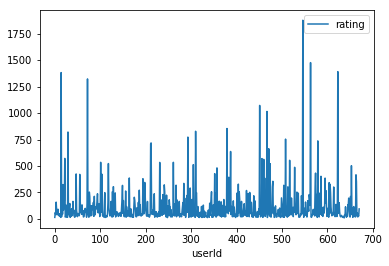

In [5]:
pd.pivot_table(data=df,index='userId',values='rating',aggfunc='count',fill_value=0).plot()

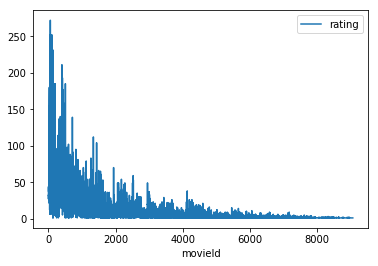

In [6]:
pd.pivot_table(data=df,index='movieId',values='rating',aggfunc='count',fill_value=0).plot()

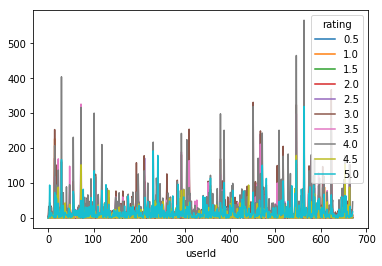

In [7]:
pd.pivot_table(data=df,index='userId',columns='rating',values='movieId',aggfunc='count',fill_value=0).plot()

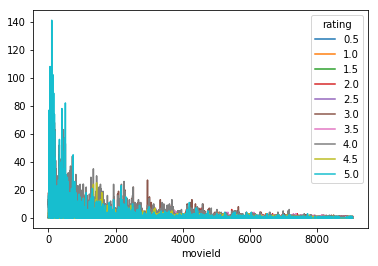

In [8]:
pd.pivot_table(data=df,index='movieId',columns='rating',values='userId',aggfunc='count',fill_value=0).plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa74d6c80b8>]],
      dtype=object)

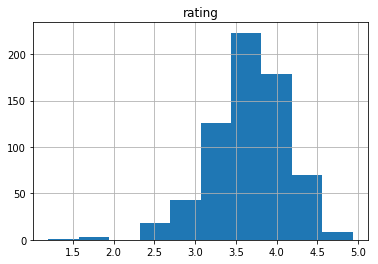

In [9]:
pd.pivot_table(data=df,index='userId',values='rating',aggfunc='mean',fill_value=0).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa74c357c18>]],
      dtype=object)

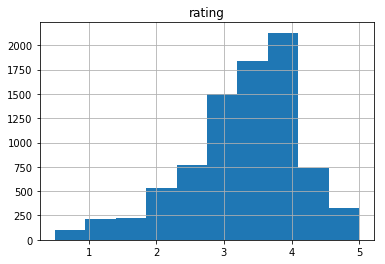

In [10]:
pd.pivot_table(data=df,index='movieId',values='rating',aggfunc='mean',fill_value=0).hist()

## Data Manipulation

In [11]:
df=pd.read_excel('Movie_Train.xlsx')
df["rating"] = df["rating"].astype('category')

In [12]:
df_temp=pd.pivot_table(data=df,index='userId',values='rating',columns='movieId',aggfunc='sum',fill_value=0)
df_temp.reset_index(inplace=True)

df_new=pd.melt(df_temp, id_vars='userId',value_vars=df_temp.columns[1:],value_name='rating')
df_new['watched'] = np.where(df_new['rating']>0, 1, 0)

In [13]:
df1=df_new[df_new['watched']==1]
df2=df_new[df_new['watched']==0].sample(len(df1))
df_test=pd.concat([df1, df2], ignore_index=True)

In [14]:
df_test.shape

(160090, 4)

## Model Preparation

In [15]:
x=df_test[['userId','movieId','rating']]
y=df_test['watched']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(x_train, y_train)
y_pred=neigh.predict(x_test)
print(classification_report(y_pred, y_test))
print("Accuracy of the model :",round(neigh.score(x_train,y_train),2))

             precision    recall  f1-score   support

          0       0.73      0.81      0.77     23871
          1       0.83      0.75      0.79     28959

avg / total       0.78      0.78      0.78     52830

Accuracy of the model : 0.81


## Testing Model with Test Data

In [17]:
df=pd.read_excel('Movie_Test.xlsx')
df['watched'] = np.where(df['rating']>0, 1, 0)
df["rating"] = df["rating"].astype('category')
x=df[['userId','movieId','rating']]
y=df['watched']
y_pred=neigh.predict(x)
print(classification_report(y_pred, y))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3297
          1       0.83      1.00      0.91     15876

avg / total       0.69      0.83      0.75     19173



/opt/usr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Question-1

Write a function to compute euclidean distance between two users for all entries except the missing yth entry. We will use KNN to find the K nearest neighbour users (users with similar taste) to x, and make predictions based on their entries for movie y.

In [18]:
def getSimilarUsers(user,num,metric):
    df_temp=pd.pivot_table(data=df,index='userId',values='rating',columns='movieId',aggfunc='sum',fill_value=0)
    df_dist=pd.DataFrame(data=pairwise_distances(df_temp.values, metric=metric))
    print("\n\nUserId \t Distance ")
    return df_dist[user].sort_values().head(num)

user=int(input("Enter User Id : "))
num=int(input("Enter Number of Similar Users : "))


print(getSimilarUsers(user,num,'euclidean'))   
    

Enter User Id : 320
Enter Number of Similar Users : 5


UserId 	 Distance 
320     0.000000
580    13.665650
394    13.674794
331    13.811227
402    13.964240
Name: 320, dtype: float64


### Question-2
Change the distance function to compute Euclidean, and see if the prediction changes. Remember to modify the kNN function to pick the smallest distances: do not reverse()!

In [19]:
user=int(input("Enter User Id : "))
num=int(input("Enter Number of Similar Users : "))


print(getSimilarUsers(user,num,'euclidean'))

Enter User Id : 454
Enter Number of Similar Users : 5


UserId 	 Distance 
454    0.000000
190    6.763875
580    7.449832
394    7.466592
331    7.713624
Name: 454, dtype: float64


### Question-3

Change the distance function to compute Manhattan, and see if the prediction changes. Remember to modify the kNN function to pick the smallest distances: do not reverse()!

In [20]:
## List of Movies a user would like based on his prior movie watching history
def getSimilarMoviesFromUser(user,num,metric):
    df_temp=pd.pivot_table(data=df,index='userId',values='rating',columns='movieId',aggfunc='sum',fill_value=0)
    df_dist=pd.DataFrame(data=pairwise_distances(df_temp.values, metric=metric))
    mylist=df_dist[user].sort_values().head(num).index
    df_temp2=df_temp.iloc[mylist]
    df_temp3=df_temp2.transpose()
    df_temp3['movieId']=df_temp3.index
    temp4=pd.melt(df_temp3,id_vars='movieId')
    temp4=temp4[temp4['value']>4]
    movieList=set(list(temp4['movieId']))
    return movieList

print("Similar Movie List using Manhattan Distance : ",getSimilarMoviesFromUser(320,5,'cityblock'))
print("Similar Movie List using Euclidean Distance : ",getSimilarMoviesFromUser(320,5,'euclidean'))
print("Similar Movie List using Chebyshev Distance : ",getSimilarMoviesFromUser(320,5,'chebyshev'))





Similar Movie List using Manhattan Distance :  {3015, 772, 1965, 519}
Similar Movie List using Euclidean Distance :  {3015, 772, 1965, 519}
Similar Movie List using Chebyshev Distance :  {1731, 772, 1797, 3142, 3015, 519, 3235, 1965, 2456, 1119}


## Question-4

Compare the accuracy with different value of K.

In [21]:
for i in range(2,30,5):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_pred=neigh.predict(x_test)
#     print(classification_report(y_pred, y_test))
    print("Accuracy of the model for i =",i,"  ",round(neigh.score(x,y),2))

Accuracy of the model for i = 2    0.73
Accuracy of the model for i = 7    0.83
Accuracy of the model for i = 12    0.8
Accuracy of the model for i = 17    0.83
Accuracy of the model for i = 22    0.81
Accuracy of the model for i = 27    0.83
